<a href="https://colab.research.google.com/github/jimwhite/commentator_ai/blob/main/Transcript_to_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
%pip install -q stability-sdk youtube-transcript-api langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.2 MB/s eta 0:00:00


In [2]:
#@title Set up Google Drive for file storage
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    outputs_path = "/content/gdrive/MyDrive/Commentator_AI/Transcript_to_Video"
    !mkdir -p $outputs_path
except:
    outputs_path = "."
print(f"Files will be saved to {outputs_path}")

Mounted at /content/gdrive
Files will be saved to /content/gdrive/MyDrive/Commentator_AI/Transcript_to_Video


In [12]:
#@title Set YouTube URL
import re
def ytIdFromURL(url:str)->str:
   data = re.findall(r"(?:v=|\/)([0-9A-Za-z_-]{11}).*", url)
   if data:
       return data[0]
   return None

YOUTUBE_URL = "https://www.youtube.com/watch?v=vPKp29Luryc" #@param {type:"string"}
video_id = ytIdFromURL(YOUTUBE_URL)
print(f'YouTube video ID = {video_id}')

YouTube video ID = vPKp29Luryc


In [19]:
#@title Get Video Transcript (JSON)
import json
import os
from youtube_transcript_api import YouTubeTranscriptApi

if not video_id:
  raise ValueError("video_id isn't set")

transcript = None
out_dir = os.path.join(outputs_path, video_id)
transcript_file_path = os.path.join(out_dir, 'transcript.json')
if os.path.exists(transcript_file_path):
  with open(transcript_file_path, 'r') as json_file:
    transcript = json.load(json_file)
    print(f'Read transcript from file: {transcript_file_path}')

if not transcript:
  transcript = YouTubeTranscriptApi.get_transcript(video_id)
  print('Got transcript from YouTube API')
  os.makedirs(out_dir, exist_ok=True)
  with open(transcript_file_path, 'w') as json_file:
    json.dump(transcript, json_file)
    print(f'Saved transcript to file: {transcript_file_path}')

transcript

Read transcript from file: /content/gdrive/MyDrive/Commentator_AI/Transcript_to_Video/vPKp29Luryc/transcript.json


[{'text': 'O say can you see,', 'start': 7.407, 'duration': 4.071},
 {'text': "by the dawn's early light,", 'start': 11.478, 'duration': 3.737},
 {'text': 'What so proudly we hailed', 'start': 15.215, 'duration': 3.837},
 {'text': "at the twilight's last gleaming?",
  'start': 19.052,
  'duration': 3.937},
 {'text': 'Whose broad stripes and bright stars,',
  'start': 22.989,
  'duration': 3.937},
 {'text': 'through the perilous fight,', 'start': 26.926, 'duration': 3.537},
 {'text': "O'er the ramparts we watched,", 'start': 30.463, 'duration': 3.737},
 {'text': 'were so gallantly streaming?', 'start': 34.2, 'duration': 4.071},
 {'text': 'And the rockets red glare,', 'start': 38.271, 'duration': 3.837},
 {'text': 'the bombs bursting in air,', 'start': 42.108, 'duration': 3.837},
 {'text': 'Gave proof through the night', 'start': 45.945, 'duration': 3.737},
 {'text': 'that our flag was still there.',
  'start': 49.682,
  'duration': 3.871},
 {'text': 'O say does that', 'start': 53.553, '

In [24]:
#@title Get Video Transcript (CSV)

# Using CSV files is a convenient way to integrate with LangChain (and LangFlow).
# Also is much more efficient in token usage so longer transcripts will work for
# any given LLM context token limit.

import csv
import os
from youtube_transcript_api import YouTubeTranscriptApi

if not video_id:
  raise ValueError("video_id isn't set")

transcript = []
out_dir = os.path.join(outputs_path, video_id)
transcript_file_path = os.path.join(out_dir, 'transcript.csv')
fieldnames = ['start', 'duration', 'text']
if os.path.exists(transcript_file_path):
  with open(transcript_file_path, 'r') as csv_file:
    reader = csv.DictReader(csv_file, fieldnames=fieldnames, quoting=csv.QUOTE_NONNUMERIC)
    next(reader)  # skip header
    for row in reader:
      transcript.append(row)
    print(f'Read transcript from file: {transcript_file_path}')

if not transcript:
  transcript = YouTubeTranscriptApi.get_transcript(video_id)
  print('Got transcript from YouTube API')
  os.makedirs(out_dir, exist_ok=True)
  with open(transcript_file_path, 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames, quoting=csv.QUOTE_NONNUMERIC)
    writer.writeheader()
    for row in transcript:
      writer.writerow(row)
    print(f'Saved transcript to file: {transcript_file_path}')

transcript

Read transcript from file: /content/gdrive/MyDrive/Commentator_AI/Transcript_to_Video/vPKp29Luryc/transcript.csv


[{'start': 7.407, 'duration': 4.071, 'text': 'O say can you see,'},
 {'start': 11.478, 'duration': 3.737, 'text': "by the dawn's early light,"},
 {'start': 15.215, 'duration': 3.837, 'text': 'What so proudly we hailed'},
 {'start': 19.052,
  'duration': 3.937,
  'text': "at the twilight's last gleaming?"},
 {'start': 22.989,
  'duration': 3.937,
  'text': 'Whose broad stripes and bright stars,'},
 {'start': 26.926, 'duration': 3.537, 'text': 'through the perilous fight,'},
 {'start': 30.463, 'duration': 3.737, 'text': "O'er the ramparts we watched,"},
 {'start': 34.2, 'duration': 4.071, 'text': 'were so gallantly streaming?'},
 {'start': 38.271, 'duration': 3.837, 'text': 'And the rockets red glare,'},
 {'start': 42.108, 'duration': 3.837, 'text': 'the bombs bursting in air,'},
 {'start': 45.945, 'duration': 3.737, 'text': 'Gave proof through the night'},
 {'start': 49.682,
  'duration': 3.871,
  'text': 'that our flag was still there.'},
 {'start': 53.553, 'duration': 2.603, 'text': '

In [27]:
transcript_csv_text = ''
with open(transcript_file_path, 'r') as csv_file:
  transcript_csv_text = csv_file.read()

transcript_csv_text

'"start","duration","text"\n7.407,4.071,"O say can you see,"\n11.478,3.737,"by the dawn\'s early light,"\n15.215,3.837,"What so proudly we hailed"\n19.052,3.937,"at the twilight\'s last gleaming?"\n22.989,3.937,"Whose broad stripes and bright stars,"\n26.926,3.537,"through the perilous fight,"\n30.463,3.737,"O\'er the ramparts we watched,"\n34.2,4.071,"were so gallantly streaming?"\n38.271,3.837,"And the rockets red glare,"\n42.108,3.837,"the bombs bursting in air,"\n45.945,3.737,"Gave proof through the night"\n49.682,3.871,"that our flag was still there."\n53.553,2.603,"O say does that"\n56.156,6.573,"star spangled banner yet wave"\n62.729,4.871,"O\'er the land of the free,"\n67.6,7.608,"and the home of the brave."\n'

In [54]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool, AgentType
from getpass import getpass

if not 'OPENAI_API_KEY' in os.environ:
  key = getpass('Enter your OpenAI API key: ')
  if key:
    os.environ['OPENAI_API_KEY'] = key

CHAT_MODEL = 'gpt-4-0613'  #@param {type:"string"}
llm = ChatOpenAI(temperature=0.3, model=CHAT_MODEL)
image_gen = ImageGeneratorTool()
tools = [Tool(name='VideoImageGenerator',
              func=image_gen.run,
              description="""Image generator for making videos.
              Arguments are 'start', 'duration', 'lyric', 'image description'""")]
mrkl = initialize_agent(tools, llm, agent=AgentType.OPENAI_FUNCTIONS, verbose=True)


In [81]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

image_description_csv_text = None
out_dir = os.path.join(outputs_path, video_id)
image_description_file_path = os.path.join(out_dir, 'image_descriptions.csv')
fieldnames = ['start', 'duration', 'text', 'description']
if os.path.exists(image_description_file_path):
  with open(image_description_file_path, 'r') as csv_file:
    image_description_csv_text = csv_file.read()
    print(f'Read image descriptions from file: {image_description_file_path}')

if not image_description_csv_text:
  chat = ChatOpenAI(temperature=0.3, model=CHAT_MODEL)
  print('ChatGPT working...')
  response = chat([HumanMessage(content=f"""You're a visual musical artist.
  Given the following lyrics choose the phrases that should be illustrated to make a timed music video for this song.
  Respond in CSV format with the columns 'start', 'duration', 'text' (for the transcription text), 'description' (for the image description).
  Keep in mind that each image description will be rendered separately so don't use any references between them.

  {transcript_csv_text}""")])
  print('Got image descriptions from ChatGPT')
  image_description_csv_text = response.content
  print(image_description_csv_text)
  os.makedirs(out_dir, exist_ok=True)
  with open(image_description_file_path, 'w', newline='') as csv_file:
    csv_file.write(response.content)
    print(f'Saved image descriptions to file: {image_description_file_path}')

image_description_csv_text

Read image descriptions from file: /content/gdrive/MyDrive/Commentator_AI/Transcript_to_Video/vPKp29Luryc/image_descriptions.csv


'"start","duration","text","description"\n7.407,4.071,"O say can you see,","A person looking out into the distance."\n11.478,3.737,"by the dawn\'s early light,","A sunrise over a landscape."\n15.215,3.837,"What so proudly we hailed","A group of people waving flags."\n19.052,3.937,"at the twilight\'s last gleaming?","A sunset with a flag in the foreground."\n22.989,3.937,"Whose broad stripes and bright stars,","Close-up of an American flag."\n26.926,3.537,"through the perilous fight,","A battle scene with soldiers."\n30.463,3.737,"O\'er the ramparts we watched,","People watching from a fortress wall."\n34.2,4.071,"were so gallantly streaming?","The American flag waving in the wind."\n38.271,3.837,"And the rockets red glare,","Rockets lighting up the night sky."\n42.108,3.837,"the bombs bursting in air,","Explosions in the sky."\n45.945,3.737,"Gave proof through the night","A night scene with a lit up flag."\n49.682,3.871,"that our flag was still there.","The American flag still standing

In [72]:
#@title Connect to the Stability API
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

if not 'STABILITY_KEY' in os.environ:
  key = getpass('Enter your Stability API key: ')
  if key:
    os.environ['STABILITY_KEY'] = key

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'],
    verbose=True,
)


Enter your Stability API key: ··········


INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


In [96]:
def generate_image(prompt: str):
  # the object returned is a python generator
  answers = stability_api.generate(
      prompt=prompt,
      seed=34567, # if provided, specifying a random seed makes results deterministic
      steps=20, # defaults to 30 if not specified
  )

  # iterating over the generator produces the api response
  for resp in answers:
      for artifact in resp.artifacts:
          if artifact.finish_reason == generation.FILTER:
              warnings.warn(
                  "Your request activated the API's safety filters and could not be processed."
                  "Please modify the prompt and try again.")
          if artifact.type == generation.ARTIFACT_IMAGE:
              img = Image.open(io.BytesIO(artifact.binary))
              return img

  print(f"No image for '{prompt}'")
  return None

INFO:stability_sdk.client:Sending request.


{'start': 7.407, 'duration': 4.071, 'text': 'O say can you see,', 'description': 'A person looking out into the distance.'}
Generating image for $A person looking out into the distance.


INFO:stability_sdk.client:Got answer 3f5f6bad-9b20-4eab-993f-afc832dc29ee with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 3.55s


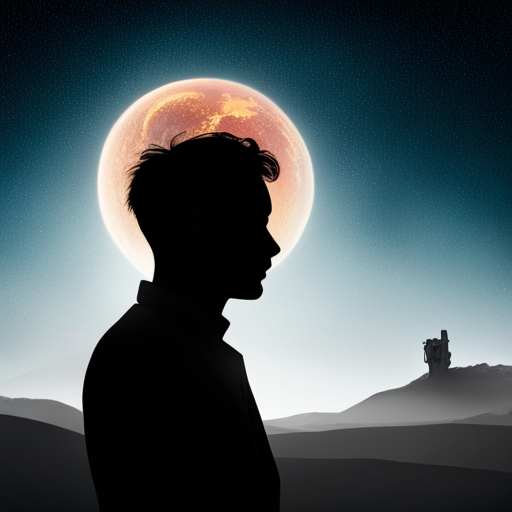

INFO:stability_sdk.client:Sending request.


{'start': 11.478, 'duration': 3.737, 'text': "by the dawn's early light,", 'description': 'A sunrise over a landscape.'}
Generating image for $A sunrise over a landscape.


INFO:stability_sdk.client:Got answer e1f6c694-8059-402f-99ca-c96cf30a40a8 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.61s


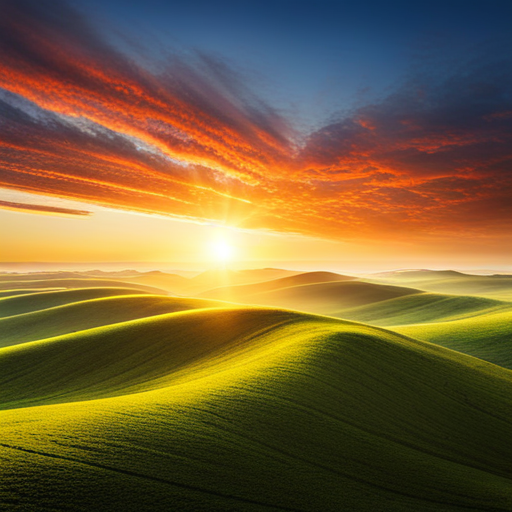

INFO:stability_sdk.client:Sending request.


{'start': 15.215, 'duration': 3.837, 'text': 'What so proudly we hailed', 'description': 'A group of people waving flags.'}
Generating image for $A group of people waving flags.


INFO:stability_sdk.client:Got answer b116756f-7a41-44a4-ae43-2b328990f820 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 3.04s


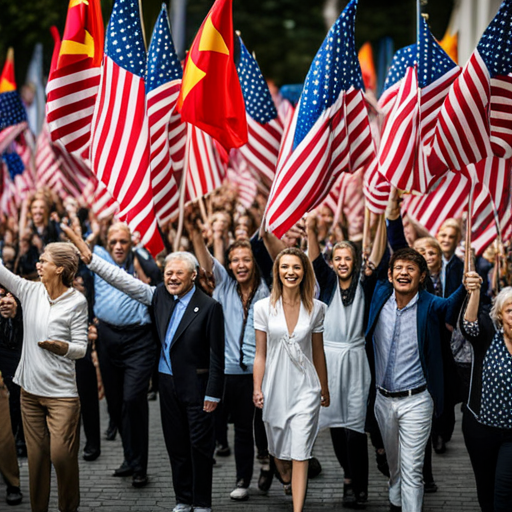

INFO:stability_sdk.client:Sending request.


{'start': 19.052, 'duration': 3.937, 'text': "at the twilight's last gleaming?", 'description': 'A sunset with a flag in the foreground.'}
Generating image for $A sunset with a flag in the foreground.


INFO:stability_sdk.client:Got answer 5aaf2b07-a2d9-47e5-b970-9a378427678a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.51s


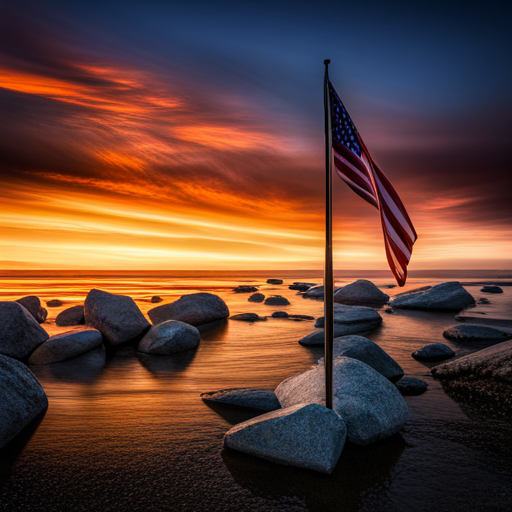

INFO:stability_sdk.client:Sending request.


{'start': 22.989, 'duration': 3.937, 'text': 'Whose broad stripes and bright stars,', 'description': 'Close-up of an American flag.'}
Generating image for $Close-up of an American flag.


INFO:stability_sdk.client:Got answer 171aa179-6b6a-4d2a-9871-673a2678f646 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.65s


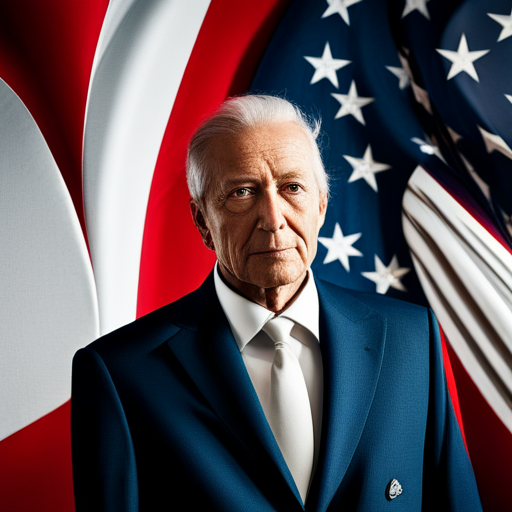

INFO:stability_sdk.client:Sending request.


{'start': 26.926, 'duration': 3.537, 'text': 'through the perilous fight,', 'description': 'A battle scene with soldiers.'}
Generating image for $A battle scene with soldiers.


INFO:stability_sdk.client:Got answer f41f3146-e31b-4e7f-9e6c-48c3a563760d with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 3.13s


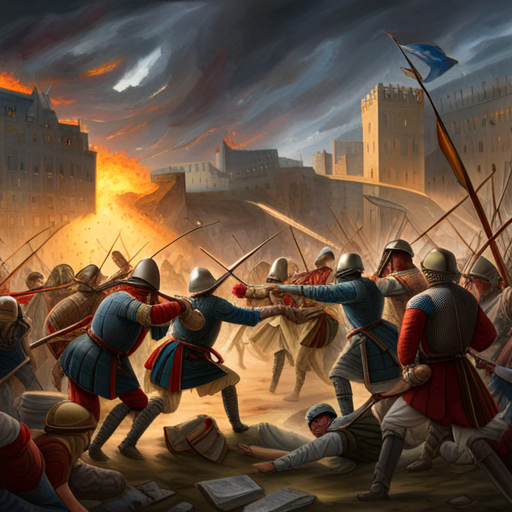

INFO:stability_sdk.client:Sending request.


{'start': 30.463, 'duration': 3.737, 'text': "O'er the ramparts we watched,", 'description': 'People watching from a fortress wall.'}
Generating image for $People watching from a fortress wall.


INFO:stability_sdk.client:Got answer 5323e32f-6a26-47e6-a132-5394b8e1eb0a with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.62s


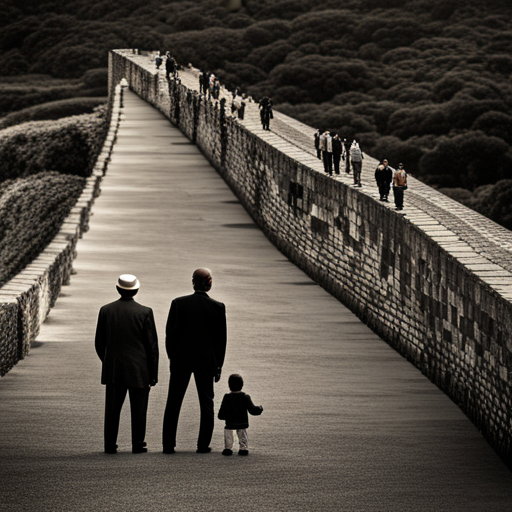

INFO:stability_sdk.client:Sending request.


{'start': 34.2, 'duration': 4.071, 'text': 'were so gallantly streaming?', 'description': 'The American flag waving in the wind.'}
Generating image for $The American flag waving in the wind.


INFO:stability_sdk.client:Got answer 75d657b7-4ca6-4778-9fc8-5de9453b05d2 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.57s


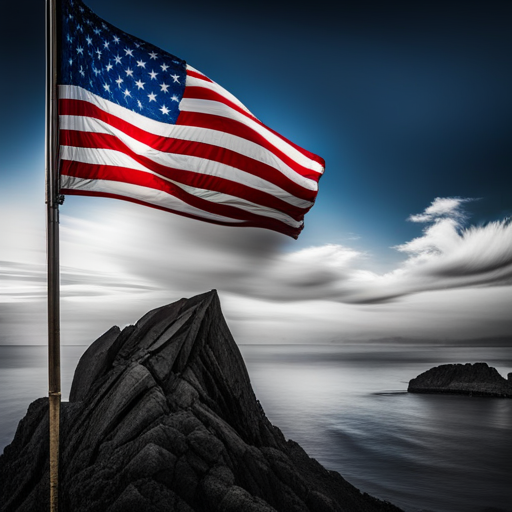

INFO:stability_sdk.client:Sending request.


{'start': 38.271, 'duration': 3.837, 'text': 'And the rockets red glare,', 'description': 'Rockets lighting up the night sky.'}
Generating image for $Rockets lighting up the night sky.


INFO:stability_sdk.client:Got answer bc6730a0-1b2d-4ffb-8991-616376152df9 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.63s


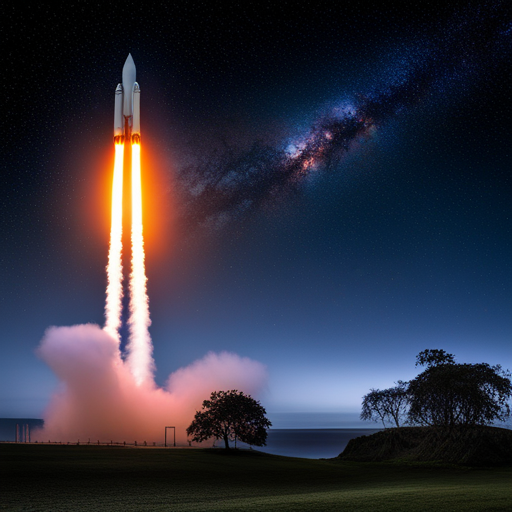

INFO:stability_sdk.client:Sending request.


{'start': 42.108, 'duration': 3.837, 'text': 'the bombs bursting in air,', 'description': 'Explosions in the sky.'}
Generating image for $Explosions in the sky.


INFO:stability_sdk.client:Got answer fd78d9b0-f736-484d-b25c-ce11b5831b90 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.67s


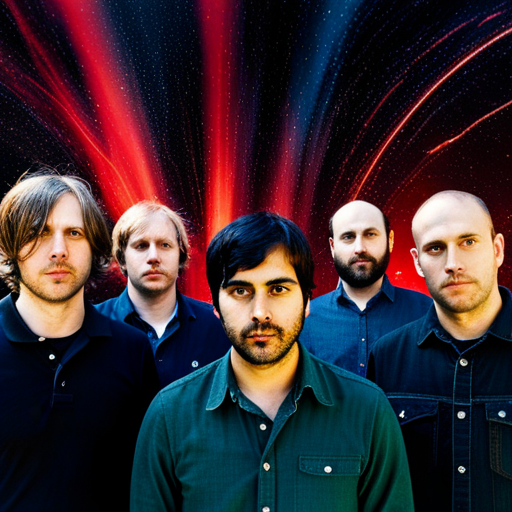

INFO:stability_sdk.client:Sending request.


{'start': 45.945, 'duration': 3.737, 'text': 'Gave proof through the night', 'description': 'A night scene with a lit up flag.'}
Generating image for $A night scene with a lit up flag.


INFO:stability_sdk.client:Got answer 542fa033-7084-4b8c-95b9-d82fe3162d74 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.54s


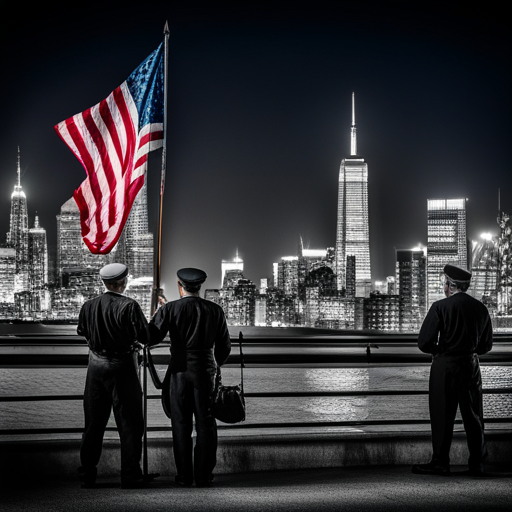

INFO:stability_sdk.client:Sending request.


{'start': 49.682, 'duration': 3.871, 'text': 'that our flag was still there.', 'description': 'The American flag still standing amidst a battlefield.'}
Generating image for $The American flag still standing amidst a battlefield.


INFO:stability_sdk.client:Got answer 0222c89f-eaf6-4cf0-935a-c035209968ed with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 3.81s


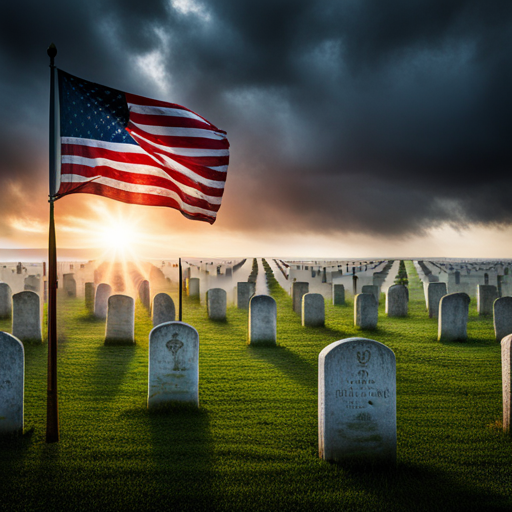

INFO:stability_sdk.client:Sending request.


{'start': 53.553, 'duration': 2.603, 'text': 'O say does that', 'description': 'A person questioning and pointing.'}
Generating image for $A person questioning and pointing.


INFO:stability_sdk.client:Got answer c227cfed-b711-41c3-adbd-d2c67867e271 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 6.62s


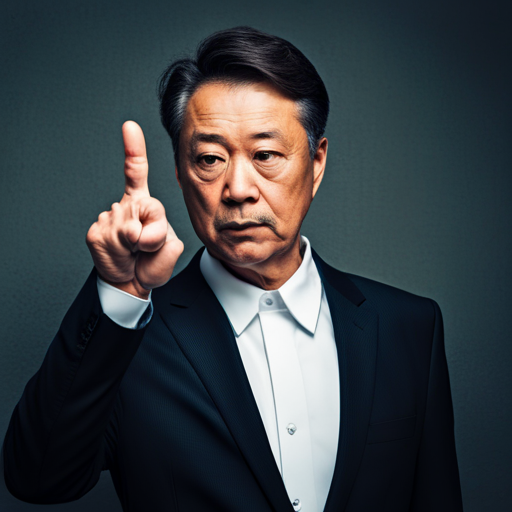

INFO:stability_sdk.client:Sending request.


{'start': 56.156, 'duration': 6.573, 'text': 'star spangled banner yet wave', 'description': 'The American flag waving in the wind.'}
Skipping description that has an image: the_american_flag_waving_in_the_wind_
{'start': 62.729, 'duration': 4.871, 'text': "O'er the land of the free,", 'description': 'A panoramic view of the American landscape.'}
Generating image for $A panoramic view of the American landscape.


INFO:stability_sdk.client:Got answer 0589f487-6712-4325-985b-43e535e3266c with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 2.56s


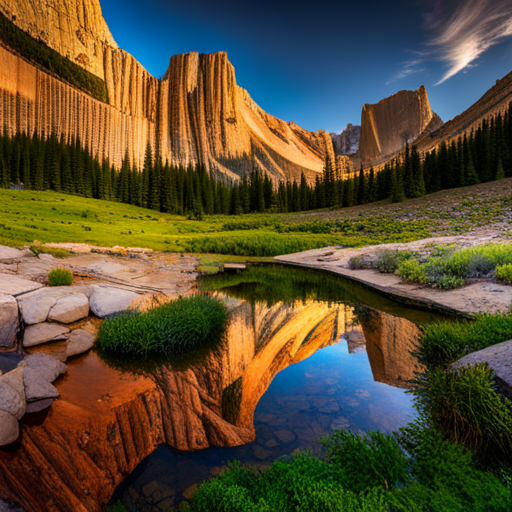

INFO:stability_sdk.client:Sending request.


{'start': 67.6, 'duration': 7.608, 'text': 'and the home of the brave.', 'description': 'A peaceful home setting with the American flag in the background.'}
Generating image for $A peaceful home setting with the American flag in the background.


INFO:stability_sdk.client:Got answer e13e2ce3-b2da-49ed-8901-b6dd0b26a855 with artifact types ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 4.37s


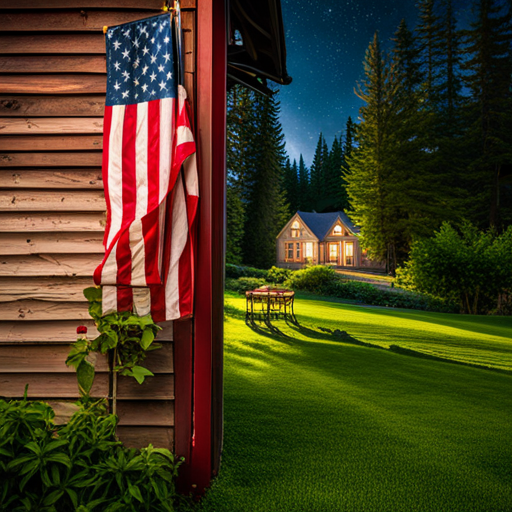

In [97]:
with open(image_description_file_path, 'r') as csv_file:
  reader = csv.DictReader(csv_file, quoting=csv.QUOTE_NONNUMERIC)
  for row in reader:
    print(row)
    description = row['description']
    filename = re.sub(r'[^\w\d-]','_', description).lower()
    image_file_path = os.path.join(out_dir, filename + '.png')
    if os.path.exists(image_file_path):
      print(f"Skipping description that has an image: {filename}")
    else:
      print(f"Generating image for {description}")
      image = generate_image(description)
      display(image)
      image.save(image_file_path)
